In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_orig = pd.read_csv("/content/drive/MyDrive/Spring 2025/ML and Climate/wildfire_project/long_2000_mean_fire_earth_data.csv")


In [ ]:
drop_cols = ['FOD_ID', 'FIRE_NAME', 'FIRE_SIZE', 'FIRE_YEAR', 'DISCOVERY_DATE', 'STAT_CAUSE_DESCR', 'STATE',  'date', 'dead_fuel_100', 'CONT_DATE']

data_class = data_orig.drop(columns=drop_cols)
data_class['FIRE_SIZE_CLASS'].unique()
mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
data_class['FIRE_SIZE_CLASS_NUM'] = data_class['FIRE_SIZE_CLASS'].map(mapping)
data_class = data_class.drop(columns=['FIRE_SIZE_CLASS'])
df = data_class.dropna()


In [ ]:
print("\nBasic statistics:")
print(df.describe().T)



Basic statistics:
                       count         mean          std         min  \
DURATION_DAYS        58241.0    14.653732    42.349292    2.000000   
LATITUDE             58241.0    40.282581     5.419148   25.224261   
LONGITUDE            58241.0  -107.332619    14.699333 -124.661500   
DISCOVERY_DOY        58241.0   195.504627    60.190004    1.000000   
dead_fuel_1000       58241.0    11.580844     4.250770    2.233598   
energy_release       58241.0    54.083867    20.684170    0.000000   
humidity             58241.0     0.006654     0.002978    0.000427   
max_temp_C           58241.0    26.481020     7.191636  -12.567877   
min_temp_C           58241.0    10.635132     6.444981  -24.340079   
precipitation        58241.0     1.317350     3.468258    0.000000   
wind_speed           58241.0     3.548502     1.497644    0.486621   
population_density   58241.0   116.262307   890.179551    0.000000   
vegetation           58241.0  2628.780550  1097.802182 -657.000000   
d

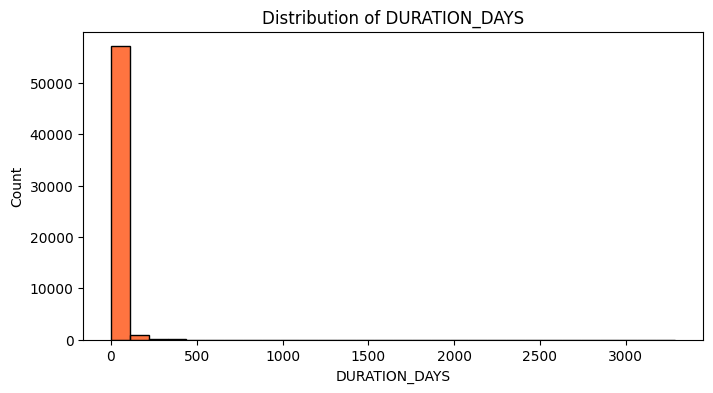

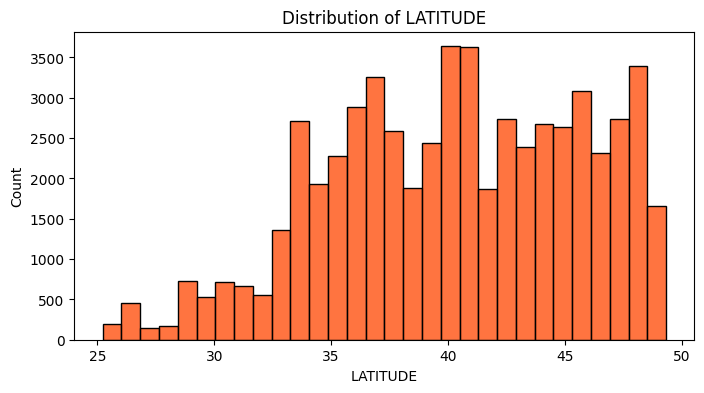

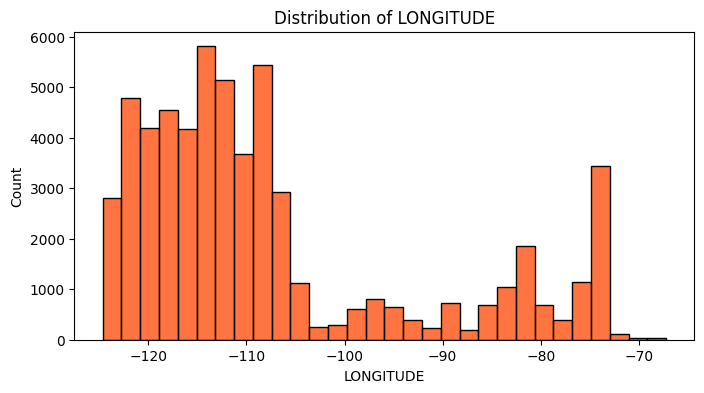

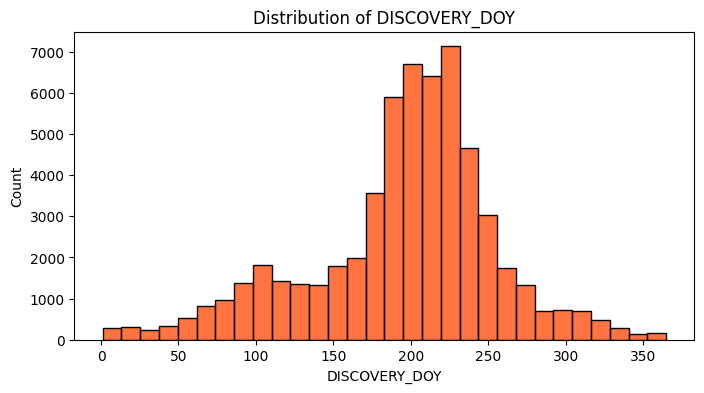

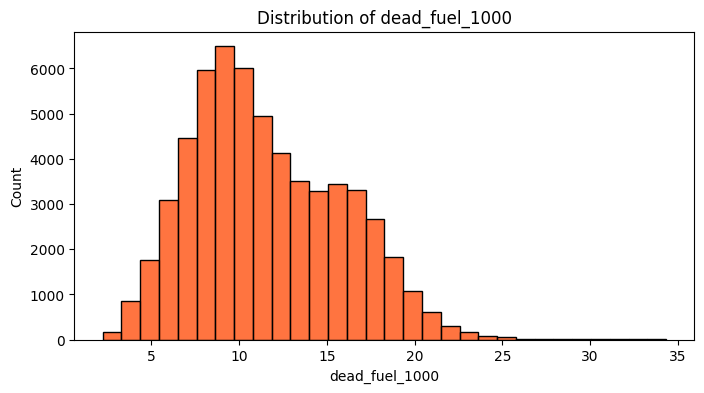

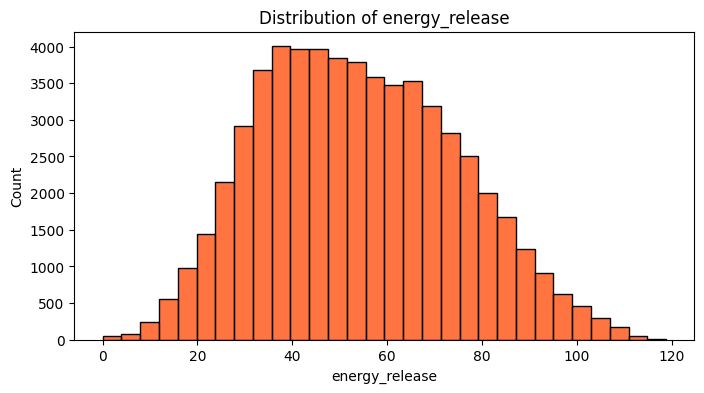

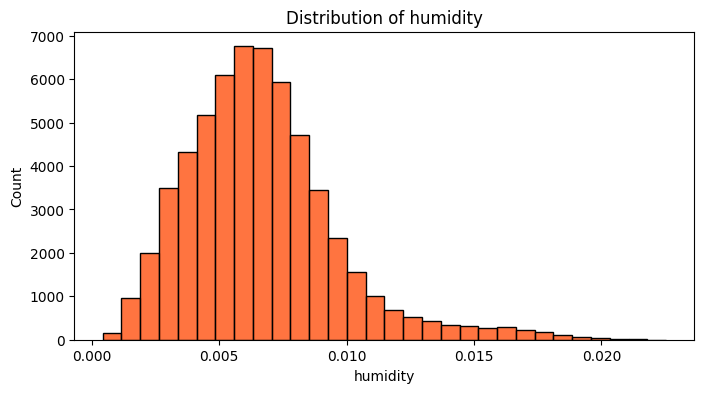

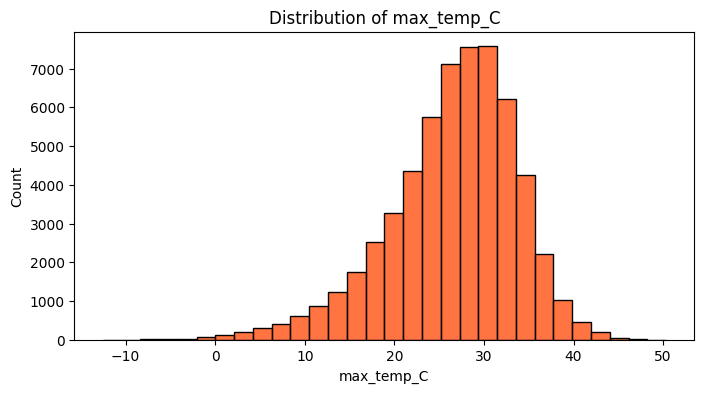

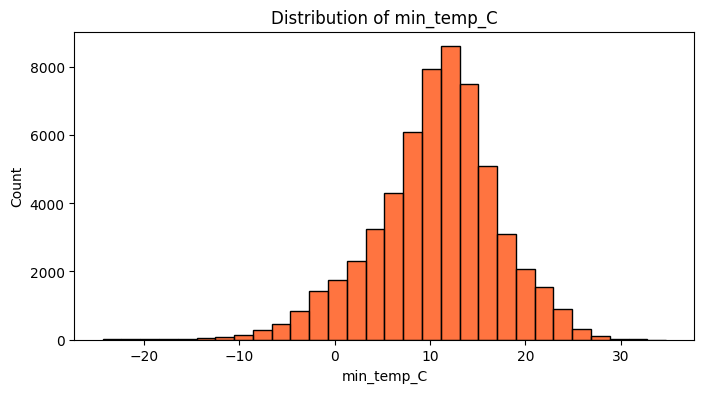

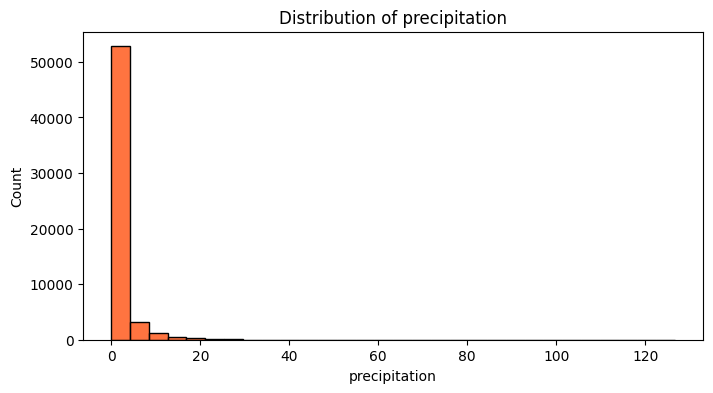

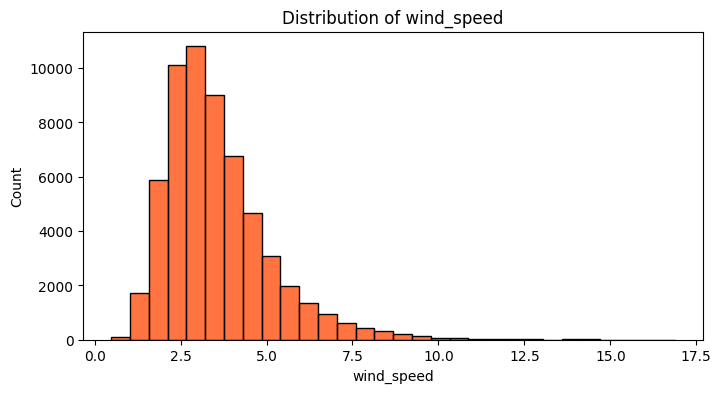

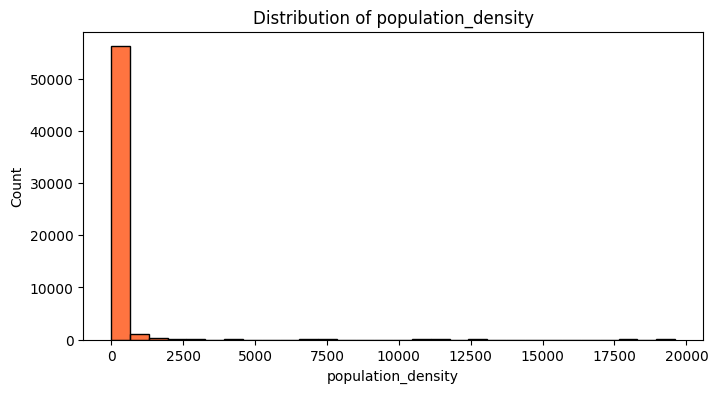

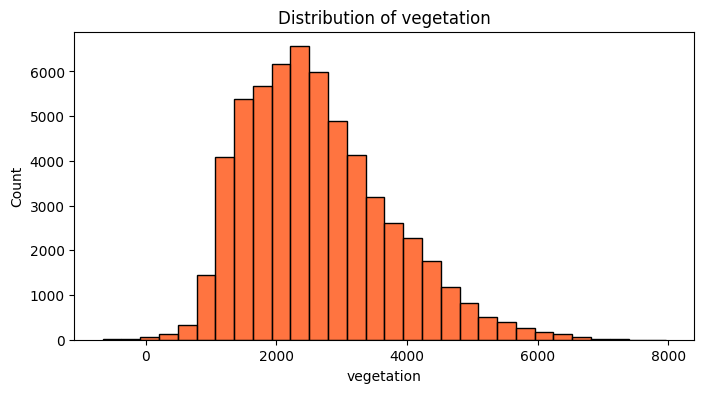

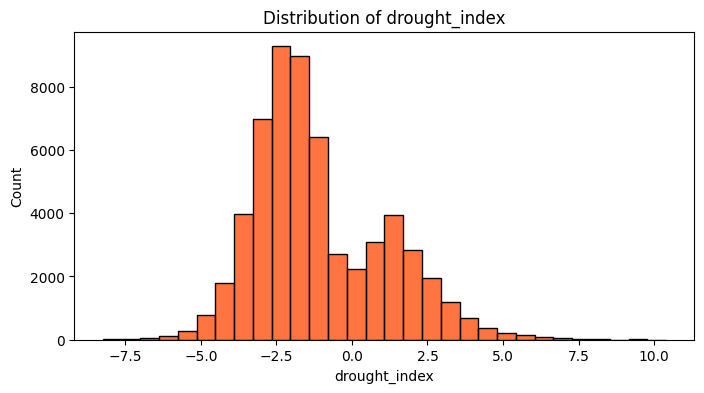

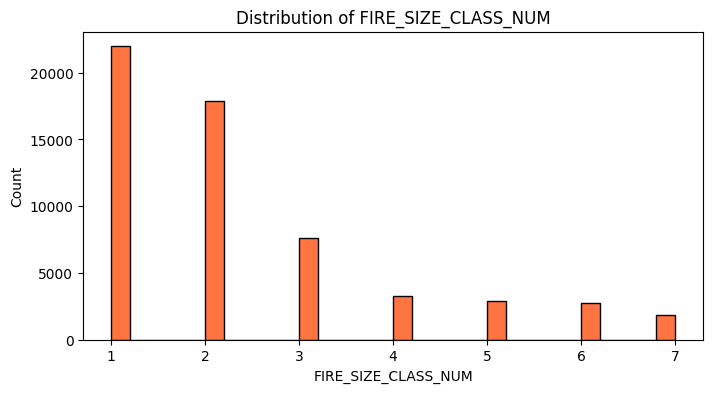

In [ ]:
num_features = df.select_dtypes(include=[np.number]).columns.tolist()

for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature].dropna(), kde=False, bins=30, color='orangered')
    plt.title(f"Distribution of {feature}")
    plt.show()


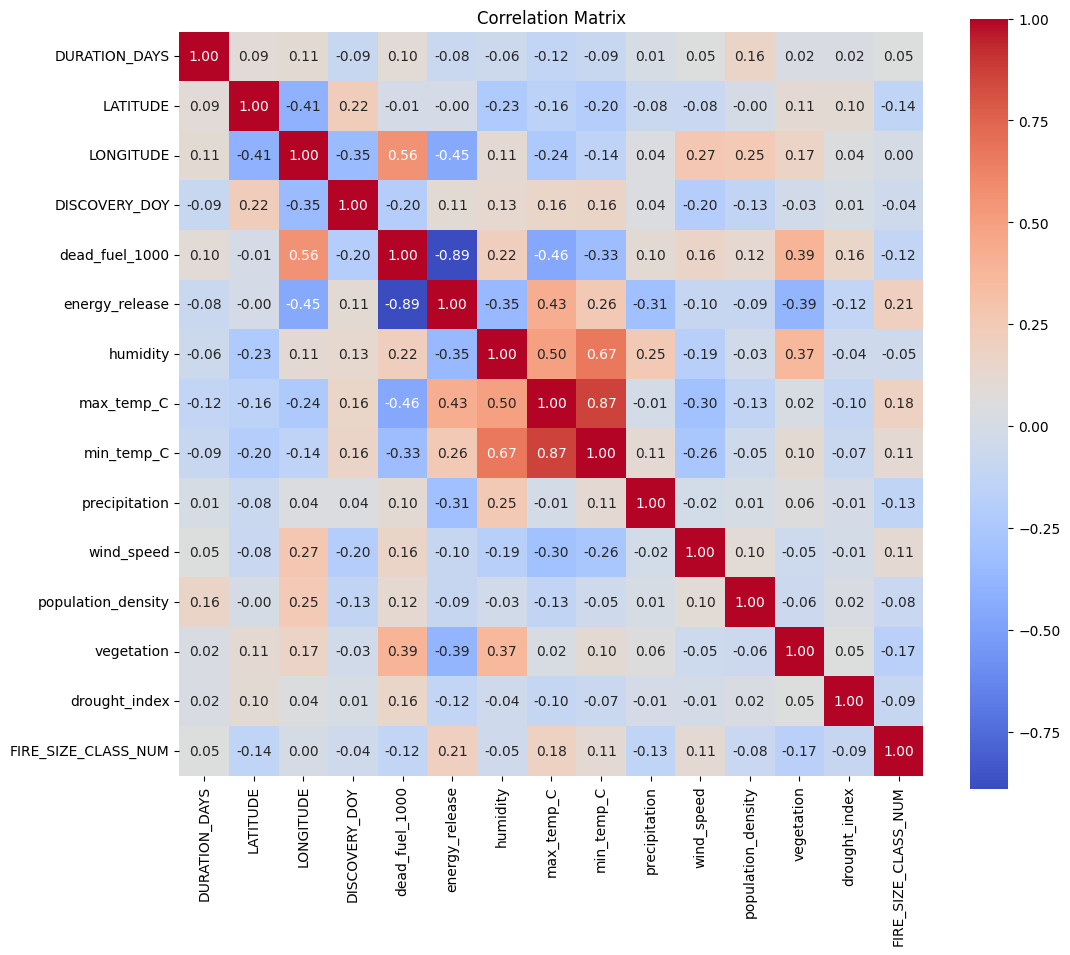

In [ ]:
corr = df[num_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
threshold = 0.8  # can adjust
high_corr_pairs = []

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

if high_corr_pairs:
    print("\nHighly correlated feature pairs (>|0.8|):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} and {pair[1]}: correlation = {pair[2]:.2f}")
else:
    print("\nNo highly correlated feature pairs above threshold.")



Highly correlated feature pairs (>|0.8|):
dead_fuel_1000 and dead_fuel_100: correlation = 0.85
energy_release and dead_fuel_100: correlation = -0.90
energy_release and dead_fuel_1000: correlation = -0.89
min_temp_C and max_temp_C: correlation = 0.87
